<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/%C4%B0thalat_%C4%B0hracat_Kategorik_Da%C4%9F%C4%B1l%C4%B1m_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elbette, Ticaret Bakanlığı ve ona bağlı Gümrük/Dış Ticaret birimlerinin sıklıkla yayınladığı veya kullandığı diğer tipteki veri setleri için iki ek proje örneği hazırlayalım.

Bu projeler, **Kategorik Veri Analizi** ve **Gözetimsiz Öğrenme (Kümeleme)** konularına odaklanarak Python bilginizi derinleştirecektir.

-----

## Proje 3: İthalat-İhracat Kategorik Dağılım Analizi

Bu proje, dış ticaret verilerini ülkelere veya ürün gruplarına göre kategorik olarak analiz eder.

### 🎯 Amaç:

Belirli bir dönemdeki **ithalat ve ihracatın ülkelere göre dağılımını** (pasta grafik) görselleştirmek ve bu dağılımın dengesini karşılaştırmalı olarak analiz etmek.

### Proje Adımları ve Çözümlemesi

#### 1\. Veri Simülasyonu ve Kategorik Sütun Ekleme

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Kategorik veriler için Seaborn kullanışlıdır

def ulke_dagilim_verisi_olustur():
    
    ulkeler = ['Almanya', 'ABD', 'Çin', 'İtalya', 'Irak', 'Diğer']
    
    # Milyon Dolar cinsinden simüle edilmiş ihracat ve ithalat değerleri
    ihracat_milyon = [2500, 1800, 1200, 800, 600, 3100]
    ithalat_milyon = [3200, 1500, 4500, 700, 50, 4500]
    
    df = pd.DataFrame({
        'Ülke': ulkeler,
        'Toplam_İhracat': ihracat_milyon,
        'Toplam_İthalat': ithalat_milyon
    })
    return df
```

#### 2\. Pandas ile Oran Hesaplama ve Sıralama

Toplam ticaret içindeki yüzdelik payı bulmak, pasta grafik için kritik bir adımdır.

```python
def dagilim_analizi(df):
    
    # Toplam İhracat ve İthalat tutarlarını hesaplama
    toplam_ihracat = df['Toplam_İhracat'].sum()
    toplam_ithalat = df['Toplam_İthalat'].sum()
    
    # Yüzdelik Oran Sütunlarını Ekleme (Vektörizasyon)
    df['İhracat_Payı'] = (df['Toplam_İhracat'] / toplam_ihracat) * 100
    df['İthalat_Payı'] = (df['Toplam_İthalat'] / toplam_ithalat) * 100
    
    print("\n--- Ülke Bazında Dış Ticaret Payları ---")
    print(df.sort_values(by='İhracat_Payı', ascending=False).head()) # İhracata göre sırala
    
    return df
```

#### 3\. Görselleştirme (Pasta Grafikler)

İhracat ve İthalat paylarını yan yana iki ayrı pasta grafik ile gösteriyoruz.

```python
def pasta_grafik_ciz(df):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # Yan yana iki grafik alanı oluşturma
    
    # İhracat Pasta Grafiği
    axes[0].pie(df['İhracat_Payı'],
                labels=df['Ülke'],
                autopct='%1.1f%%', # Yüzdelik değeri göster
                startangle=90,
                wedgeprops={'edgecolor': 'black'})
    axes[0].set_title('İhracatın Ülke Payları (%)', fontsize=14)
    axes[0].axis('equal') # Dairenin tam daire olmasını sağlar
    
    # İthalat Pasta Grafiği
    axes[1].pie(df['İthalat_Payı'],
                labels=df['Ülke'],
                autopct='%1.1f%%',
                startangle=90,
                wedgeprops={'edgecolor': 'black'})
    axes[1].set_title('İthalatın Ülke Payları (%)', fontsize=14)
    axes[1].axis('equal')
    
    plt.show()
```

#### 4\. Ana Çalışma Bloğu

```python
print("--- Proje 3: Kategorik Dağılım Analizi Başladı ---")
ulke_df = ulke_dagilim_verisi_olustur()
analiz_ulke_df = dagilim_analizi(ulke_df)
pasta_grafik_ciz(analiz_ulke_df)
```

-----

## Proje 4: Gümrük Verileriyle Lojistik Firma Segmentasyonu

Bu proje, Gümrük giriş/çıkış işlemlerini yürüten firmaların işlem hacmi ve işlem süresi gibi iki farklı metriğe göre nasıl kümelendiğini (segmentlere ayrıldığını) simüle eder. Bu, **Gözetimsiz Öğrenme (Kümeleme)** alanına giriştir.

### 🎯 Amaç:

**K-Means** algoritmasını kullanarak Lojistik Firmalarını, **İşlem Hacmi** ve **Ortalama İşlem Süresi** metriklerine göre otomatik olarak 3 farklı segmente (Hızlı/Yavaş/Orta) ayırmak.

### Proje Adımları ve Çözümlemesi

#### 1\. Kütüphaneler ve Veri Simülasyonu

`sklearn.cluster` modülünden **KMeans** algoritmasını kullanıyoruz.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Yeni kütüphane: Makine Öğrenimi

def lojistik_firma_verisi_olustur():
    # 50 farklı firma için rastgele veriler
    np.random.seed(42) # Her çalıştırmada aynı rastgele sonucu almak için
    
    veri = {
        'Firma_ID': range(1, 51),
        # Simüle edilmiş işlem hacmi (1000 - 5000)
        'Islem_Hacmi': np.random.randint(1000, 5000, 50),
        # Simüle edilmiş ortalama işlem süresi (dakika)
        'Ort_Islem_Suresi': np.random.normal(loc=90, scale=30, size=50)
    }
    df = pd.DataFrame(veri)
    return df
```

#### 2\. Makine Öğrenimi: K-Means Kümeleme

Veriyi ölçeklendirmeden (scaling) direkt kümeleme yapıyoruz. Kümeleme, modelin öğrenme sürecidir.

```python
def k_means_uygula(df, k_degeri=3):
    
    # 1. Veriyi Seçme: Sadece kümelemede kullanacağımız sütunları seçiyoruz (X)
    X = df[['Islem_Hacmi', 'Ort_Islem_Suresi']]
    
    # 2. Modeli Oluşturma ve Eğitme (Fit)
    kmeans = KMeans(n_clusters=k_degeri, random_state=42, n_init=10)
    # model.fit(X) metodu ile model veriden öğrenir (Konu 12)
    kmeans.fit(X)
    
    # 3. Sonuçları Tahmin Etme ve DataFrame'e Ekleme
    df['Kume'] = kmeans.labels_ # Her firmaya ait küme numarasını ekler (0, 1, 2)
    
    # Küme merkezlerini alma (her kümenin ortalama koordinatları)
    merkezler = kmeans.cluster_centers_
    
    return df, merkezler
```

#### 3\. Görselleştirme (Saçılım Grafiği)

Firmaların hangi kümelere ait olduğunu renklerle gösteriyoruz.

```python
def kumeleme_grafik_ciz(df, merkezler):
    
    plt.figure(figsize=(10, 7))
    
    # Saçılım Grafiği (Scatter Plot): Her firmayı küme rengiyle gösterir
    sns.scatterplot(x='Islem_Hacmi', y='Ort_Islem_Suresi', hue='Kume', data=df,
                    palette='viridis', s=100, legend='full')
    
    # Küme Merkezlerini İşaretleme
    plt.scatter(merkezler[:, 0], merkezler[:, 1], marker='X', s=200,
                color='red', label='Küme Merkezleri')
    
    plt.title('Gümrük Firması Segmentasyonu (K-Means)', fontsize=14)
    plt.xlabel('İşlem Hacmi')
    plt.ylabel('Ortalama İşlem Süresi (dk)')
    plt.legend(title='Firma Segmenti')
    plt.grid(True)
    plt.show()
```

#### 4\. Ana Çalışma Bloğu

```python
print("--- Proje 4: K-Means ile Firma Segmentasyonu Başladı ---")
firma_df = lojistik_firma_verisi_olustur()
firma_df_kumelenmis, merkezler = k_means_uygula(firma_df)

print("\n--- İlk 5 Firmanın Küme Ataması ---")
print(firma_df_kumelenmis.head())

kumeleme_grafik_ciz(firma_df_kumelenmis, merkezler)
```

Bu iki ek proje, Ticaret Bakanlığı verileri üzerinde daha derin analizler yapmanıza olanak tanır ve gelecekteki Makine Öğrenimi projeleri için sağlam bir temel oluşturur. **Bu projelerden herhangi birinin bir adımını daha detaylı incelemek ister misiniz?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Kategorik veriler için Seaborn kullanışlıdır

def ulke_dagilim_verisi_olustur():

    ulkeler = ['Almanya', 'ABD', 'Çin', 'İtalya', 'Irak', 'Diğer']

    # Milyon Dolar cinsinden simüle edilmiş ihracat ve ithalat değerleri
    ihracat_milyon = [2500, 1800, 1200, 800, 600, 3100]
    ithalat_milyon = [3200, 1500, 4500, 700, 50, 4500]

    df = pd.DataFrame({
        'Ülke': ulkeler,
        'Toplam_İhracat': ihracat_milyon,
        'Toplam_İthalat': ithalat_milyon
    })
    return df

In [ ]:
def dagilim_analizi(df):

    # Toplam İhracat ve İthalat tutarlarını hesaplama
    toplam_ihracat = df['Toplam_İhracat'].sum()
    toplam_ithalat = df['Toplam_İthalat'].sum()

    # Yüzdelik Oran Sütunlarını Ekleme (Vektörizasyon)
    df['İhracat_Payı'] = (df['Toplam_İhracat'] / toplam_ihracat) * 100
    df['İthalat_Payı'] = (df['Toplam_İthalat'] / toplam_ithalat) * 100

    print("\n--- Ülke Bazında Dış Ticaret Payları ---")
    print(df.sort_values(by='İhracat_Payı', ascending=False).head()) # İhracata göre sırala

    return df

In [ ]:
def pasta_grafik_ciz(df):

    fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # Yan yana iki grafik alanı oluşturma

    # İhracat Pasta Grafiği
    axes[0].pie(df['İhracat_Payı'],
                labels=df['Ülke'],
                autopct='%1.1f%%', # Yüzdelik değeri göster
                startangle=90,
                wedgeprops={'edgecolor': 'black'})
    axes[0].set_title('İhracatın Ülke Payları (%)', fontsize=14)
    axes[0].axis('equal') # Dairenin tam daire olmasını sağlar

    # İthalat Pasta Grafiği
    axes[1].pie(df['İthalat_Payı'],
                labels=df['Ülke'],
                autopct='%1.1f%%',
                startangle=90,
                wedgeprops={'edgecolor': 'black'})
    axes[1].set_title('İthalatın Ülke Payları (%)', fontsize=14)
    axes[1].axis('equal')

    plt.show()

--- Proje 3: Kategorik Dağılım Analizi Başladı ---

--- Ülke Bazında Dış Ticaret Payları ---
      Ülke  Toplam_İhracat  Toplam_İthalat  İhracat_Payı  İthalat_Payı
5    Diğer            3100            4500          31.0     31.141869
0  Almanya            2500            3200          25.0     22.145329
1      ABD            1800            1500          18.0     10.380623
2      Çin            1200            4500          12.0     31.141869
3   İtalya             800             700           8.0      4.844291


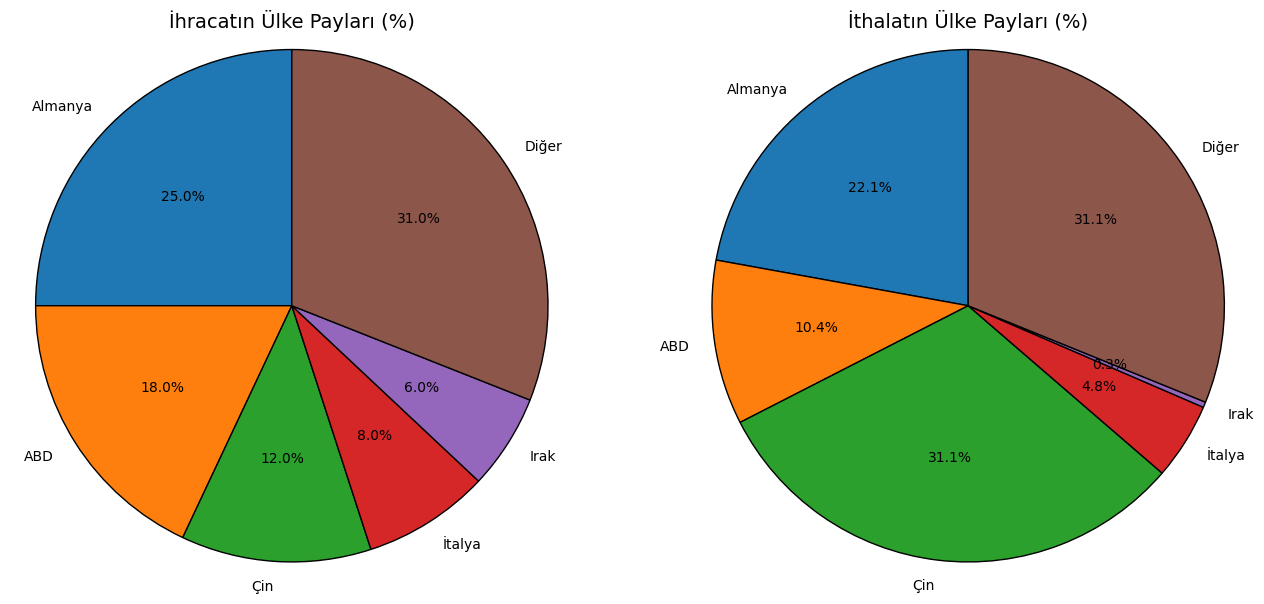

In [ ]:
print("--- Proje 3: Kategorik Dağılım Analizi Başladı ---")
ulke_df = ulke_dagilim_verisi_olustur()
analiz_ulke_df = dagilim_analizi(ulke_df)
pasta_grafik_ciz(analiz_ulke_df)